In [10]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
	StratifiedKFold,
	cross_validate,
)
from sklearn.metrics import (
	confusion_matrix,
)
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

warnings.filterwarnings("ignore")

#### Load my data

In [11]:
X_train = np.load("artifacts/X_train.npz")["arr_0"]
Y_train = np.load("artifacts/y_train.npz")["arr_0"]
X_test = np.load("artifacts/X_test.npz")["arr_0"]
Y_test = np.load("artifacts/y_test.npz")["arr_0"]

#### Define multi models

In [12]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
}


#### Configure K-Fold cv

In [13]:
cv = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

In [14]:
trained_models = {}

for model_name, model in models.items():
    print(f"\nCross validation on {model_name}")
    
    cv_results = cross_validate(
		model,
		X_train,
		Y_train,
		cv=cv,
		return_estimator=True, #To return the best model alternative way for kfold
		scoring=("f1"),
		return_train_score=False,
	)
    test_score = cv_results["test_score"]
    best_index = np.argmax(test_score)

    estimator = cv_results["estimator"][best_index]
    trained_models[model_name] = estimator


Cross validation on Logistic Regression

Cross validation on Random Forest

Cross validation on Decision Tree


In [17]:
Y_hat_tests = {}
for model_name, model in trained_models.items():
    Y_hat_test = model.predict(X_test)
    Y_hat_tests[model_name] = Y_hat_test
Y_hat_tests

{'Logistic Regression': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Random Forest': array([0, 0, 0, ..., 0, 0, 1], shape=(1999,)),
 'Decision Tree': array([0, 1, 1, ..., 1, 1, 1], shape=(1999,))}

In [18]:
cm1 = confusion_matrix(Y_test, Y_hat_tests["Logistic Regression"])
cm2 = confusion_matrix(Y_test, Y_hat_tests["Random Forest"])
cm3 = confusion_matrix(Y_test, Y_hat_tests["Decision Tree"])


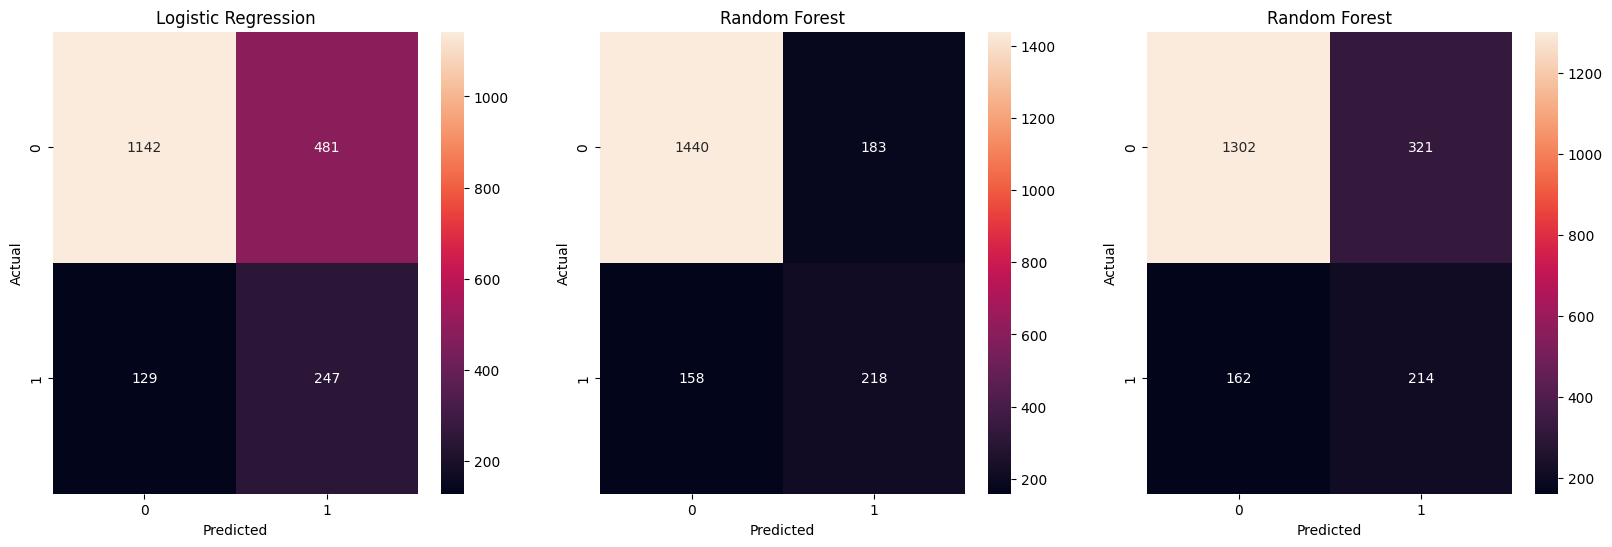

In [20]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(cm1, annot=True, fmt="d", ax=ax1)
ax1.set_title("Logistic Regression")
ax1.set_xlabel("Predicted")
ax1.set_ylabel("Actual")

sns.heatmap(cm2, annot=True, fmt="d", ax=ax2)
ax2.set_title("Random Forest")
ax2.set_xlabel("Predicted")
ax2.set_ylabel("Actual")

sns.heatmap(cm3, annot=True, fmt="d", ax=ax3)
ax3.set_title("Random Forest")
ax3.set_xlabel("Predicted")
ax3.set_ylabel("Actual")

plt.show()